## Importando as LIBS

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Carregando e visualizando os dados

In [18]:
df = pd.read_csv("./output/dataset_notebook.csv", sep=";")

In [19]:
df.head()

,Descrição,TotalReviews,Preço,Url,Loja
0,Notebook Lenovo Ultrafino Ideapad 3i Intel Cor...,54,3562.49,https://www.americanas.com.br/produto/31713181...,Americanas
1,Notebook Samsung Book Intel Celeron-6305 4GB 5...,88,2159.13,https://www.americanas.com.br/produto/30813587...,Americanas
2,Notebook Samsung Book Intel Core i5-1135G7 8GB...,0,3553.74,https://www.americanas.com.br/produto/30813588...,Americanas
3,Notebook Lenovo Ultrafino Ideapad S145 AMD Ryz...,7,2952.76,https://www.americanas.com.br/produto/33836426...,Americanas
4,Notebook Positivo Motion Q464C Intel Atom Z835...,72,1424.99,https://www.americanas.com.br/produto/28311550...,Americanas


In [20]:
df.count()

Descrição       250
TotalReviews    250
Preço           250
Url             250
Loja            250
dtype: int64

### Verificação de Valores Nulos: NaN

In [21]:
df.isnull().sum().sum()

0

**Sem valores nulos, isso foi graça ao tratamento prévio da obtenção dos dados**

### Estatística Descritiva

In [23]:
df.describe().round(2)

,TotalReviews,Preço
count,250.00,250.00
mean,9.44,4085.27
std,25.76,2673.61
min,0.00,0.00
25%,0.00,2726.37
50%,0.50,3682.06
75%,5.00,4944.32
max,160.00,33029.10


**Um preço igual a 0 pode ser um erro na obtenção dos dados**

In [29]:
df.query("Preço == 0")

,Descrição,TotalReviews,Preço,Url,Loja
75,Notebook Samsung Book X40 10ª Intel Core i5 8G...,66,0.0,https://www.americanas.com.br/produto/17725510...,Americanas


## Histograma: Distribuição de Frequencias

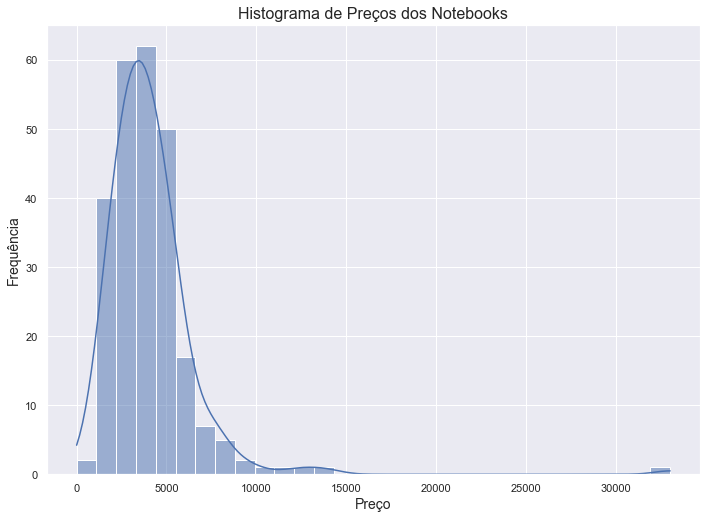

In [30]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
histplot = sns.histplot(data=df, x='Preço', linewidth=1, bins=30, kde=True)
histplot.axes.set_title("Histograma de Preços dos Notebooks", fontsize=16)
histplot.set_xlabel("Preço", fontsize=14)
histplot.set_ylabel("Frequência", fontsize=14)
plt.show()

**Já é notorio a presença de outliers**

## Boxplot: Visualização de outliers

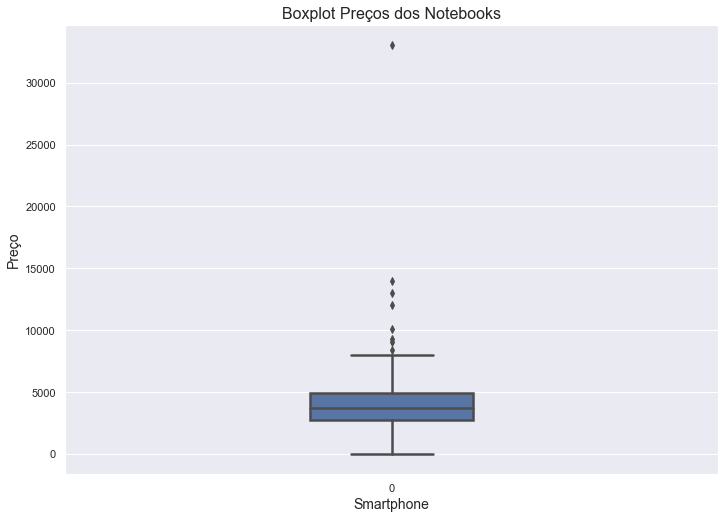

In [31]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
boxplot = sns.boxplot(data=df['Preço'], linewidth=2.5, width=0.25)
boxplot.axes.set_title("Boxplot Preços dos Notebooks", fontsize=16)
boxplot.set_xlabel("Notebook", fontsize=14)
boxplot.set_ylabel("Preço", fontsize=14)
plt.show()

**Percebe-se que há outliers no departamento de notebooks.**

**Podem ser notebooks especiais, como gamers ou outros**

**Haverá agora um trabalho de remoção de outliers do nosso dataset**

## Função que retira os indices dos outliers do nosso dataframe

In [32]:
def outliers_indexes(df, ft):
    """ 
    Função que retorna o índice dos outliers
    Embasamento matemático:
    Amplitude Interquartil => IQR = Quartil_3 - Quartil_1
    Limite Inferior => LI = Quartil_1 - 1.5*IQR
    Limite Superior => LS = Quartil_3 + 1.5*IQR
    Todos os dados que estiverem acima do limite superior ou abaixo do limite inferior, são outliers
    """
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    LI = Q1 - 1.5*IQR
    LS = Q3 + 1.5*IQR
    
    lista_indices = df.index[ (df[ft] < LI) | (df[ft] > LS) ]
    
    return lista_indices

In [35]:
# Cria-se uma lista vazia para armazenar os índices de saídas de múltiplas colunas 
# (somente caso se quisesse tirar outliers de multiplas colunas)
index_list = []
for feature in ["Preço", "TotalReviews"]:
    index_list.extend(outliers_indexes(df, feature))

In [36]:
outliers_index_list = outliers_indexes(df, 'Preço')

In [37]:
len(outliers_index_list)

8

### Função de Remoção de Outliers

Por fim, define-se uma função para a remoção de todos os registros que contém outliers, tendo a lista de índices como input

In [38]:
def remove_outliers(df, index_list):
    index_list = sorted(set(index_list))
    # Drop dos outliers
    df = df.drop(index_list)
    return df   

### Limpa-se o dataframe dos outliers

In [39]:
df_clean = remove_outliers(df, outliers_index_list)

In [40]:
df_clean.shape

(242, 5)

Foram removidos 8 registros, exatamente como esperado

## Histograma: Distribuição de Frequência (Outliers removidos)

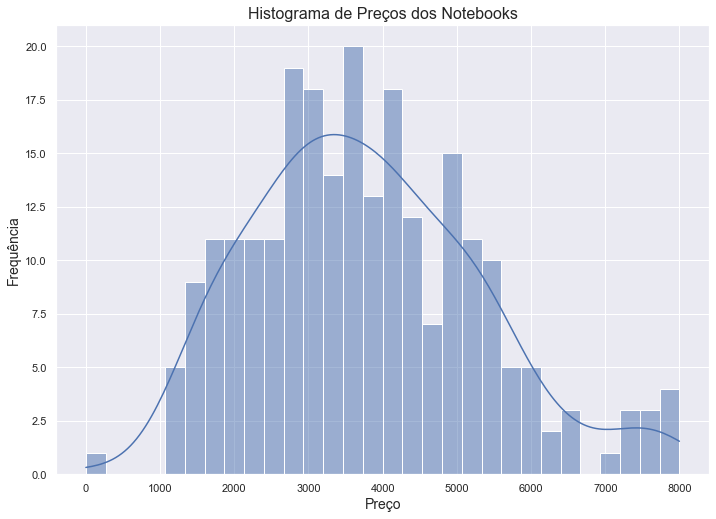

In [45]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
histplot = sns.histplot(data=df_clean, x='Preço', linewidth=1, bins=30, kde=True)
histplot.axes.set_title("Histograma de Preços dos Notebooks", fontsize=16)
histplot.set_xlabel("Preço", fontsize=14)
histplot.set_ylabel("Frequência", fontsize=14)
plt.show()

### Boxplt sem Outliers

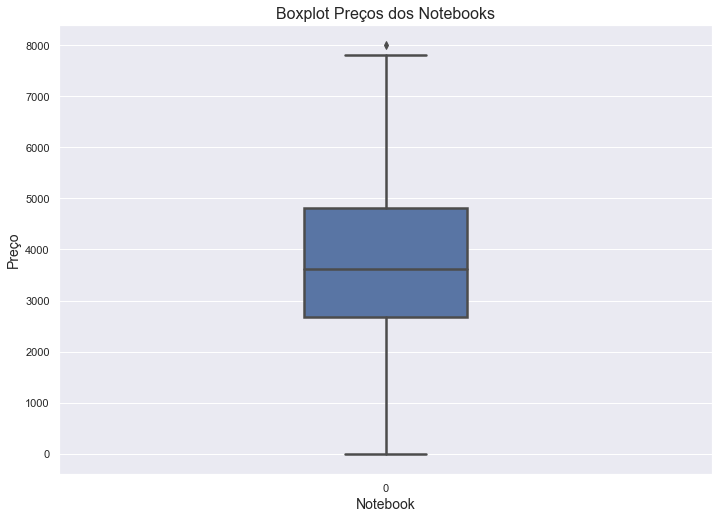

In [46]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
boxplot = sns.boxplot(data=df_clean['Preço'], linewidth=2.5, width=0.25)
boxplot.axes.set_title("Boxplot Preços dos Notebooks", fontsize=16)
boxplot.set_xlabel("Notebook", fontsize=14)
boxplot.set_ylabel("Preço", fontsize=14)
plt.show()

### Estatística descritiva, sem outliers

In [48]:
df_clean.describe().round(2)

,TotalReviews,Preço
count,242.00,242.00
mean,9.61,3770.79
std,26.13,1540.73
min,0.00,0.00
25%,0.00,2687.32
50%,1.00,3609.52
75%,5.00,4805.10
max,160.00,7999.00


**Um interessante ponto é a distribuição de preço com um desvio padrão de 1500 R$, como geralmente é esperado, quanto melhor é a configuração maior é o preço, onde geralmente é essa a diferença**

### Item mais caro (Com Outliers)

In [53]:
df_mask = df['Preço']==max(df['Preço'])
filtered_df = df[df_mask]
filtered_df

,Descrição,TotalReviews,Preço,Url,Loja
239,Notebook Dell Alienware x17 R1 AW17-X17R1-M30S...,0,33029.1,https://www.americanas.com.br/produto/34731980...,Americanas


## Item mais caro (Sem Outliers)

In [54]:
df_mask = df_clean['Preço']==max(df_clean['Preço'])
filtered_df = df_clean[df_mask]
filtered_df

,Descrição,TotalReviews,Preço,Url,Loja
44,Notebook Gamer Aspire Nitro 5 AN515-44-R8HN am...,8,7999.0,https://www.americanas.com.br/produto/37803924...,Americanas


### 5 itens com preço menor ou igual a média

In [56]:
df_mask = df_clean['Preço']<=df_clean['Preço'].mean()
filtered_df = df_clean[df_mask]
filtered_df.sort_values(by=['Preço'], ascending=False)[:5]

,Descrição,TotalReviews,Preço,Url,Loja
192,Notebook Acer Aspire 5 A515-51G-50W8 Intel Cor...,0,3713.39,https://www.americanas.com.br/produto/48713303...,Americanas
53,Notebook Samsung Book Intel Core i5-1135G7 8GB...,4,3699.99,https://www.americanas.com.br/produto/30813579...,Americanas
191,Notebook Lenovo Ultrafino ideapad S145 Dual Co...,9,3697.00,https://www.americanas.com.br/produto/18191913...,Americanas
160,"Notebook Samsung i5 8GB 1TB 15,6 Book Win10 Ci...",1,3695.12,https://www.americanas.com.br/produto/32476901...,Americanas
13,"Notebook Dell Inspiron 3501-M46P 15.6"" HD 10ª ...",9,3695.12,https://www.americanas.com.br/produto/37146830...,Americanas


## Adicionando Modelos

In [57]:
objeto = "Acer"
df_clean[df_clean["Descrição"].str.lower().str.contains(objeto.lower())].head()

,Descrição,TotalReviews,Preço,Url,Loja
6,Notebook Acer Aspire 5 A514-53-39KH Intel Core...,19,3068.07,https://www.americanas.com.br/produto/31948572...,Americanas
16,Notebook Gamer Acer Nitro 5 AN515-54-574Q Inte...,18,5129.05,https://www.americanas.com.br/produto/17880095...,Americanas
29,Notebook Acer Aspire 5 A515-54G-52C1 Intel Cor...,35,4169.55,https://www.americanas.com.br/produto/32810433...,Americanas
36,Notebook Acer Aspire 3 Intel Celeron 4GB 1TB E...,16,2483.10,https://www.americanas.com.br/produto/18500941...,Americanas
42,Notebook Acer Aspire 5 A514-54G-54Y4 Intel Cor...,0,4060.34,https://www.americanas.com.br/produto/38250890...,Americanas


In [60]:
modelos = ["lenovo", "positivo", "samsung", "dell", "acer", "apple" ]
count = 0
df_clean["Modelo"] = np.NaN

for index, row in df_clean.iterrows():
    for modelo in modelos:
        if modelo in row["Descrição"].lower():
            df_clean.loc[index, "Modelo"] = modelo.capitalize()
            


In [61]:
df_clean

,Descrição,TotalReviews,Preço,Url,Loja,Modelo
0,Notebook Lenovo Ultrafino Ideapad 3i Intel Cor...,54,3562.49,https://www.americanas.com.br/produto/31713181...,Americanas,Lenovo
1,Notebook Samsung Book Intel Celeron-6305 4GB 5...,88,2159.13,https://www.americanas.com.br/produto/30813587...,Americanas,Samsung
2,Notebook Samsung Book Intel Core i5-1135G7 8GB...,0,3553.74,https://www.americanas.com.br/produto/30813588...,Americanas,Samsung
3,Notebook Lenovo Ultrafino Ideapad S145 AMD Ryz...,7,2952.76,https://www.americanas.com.br/produto/33836426...,Americanas,Lenovo
4,Notebook Positivo Motion Q464C Intel Atom Z835...,72,1424.99,https://www.americanas.com.br/produto/28311550...,Americanas,Positivo
...,...,...,...,...,...,...
245,Notebook Multilaser M8W Plus 2 em 1 Hibrido In...,8,1101.04,https://www.americanas.com.br/produto/18854915...,Americanas,NaN
246,Notebook Lenovo IdeaPad 330 15.6 Intel Dual Co...,9,3599.00,https://www.americanas.com.br/produto/15071328...,Americanas,Lenovo
247,"Notebook Dell Inspiron 3501-M80P 15.6"" HD 11ª ...",2,5579.10,https://www.americanas.com.br/produto/30868304...,Americanas,Dell
248,"Notebook Lenovo Yoga 7i 2 em 1 14"" i7-1165G7 8...",2,7679.00,https://www.americanas.com.br/produto/36281013...,Americanas,Lenovo


## Retirando os modelos não encontrados

In [64]:
df_clean = df_clean[df_clean["Modelo"].notna()]
df_clean.shape

(185, 6)

### Visualizando alguns dados utilizando o SEABORN

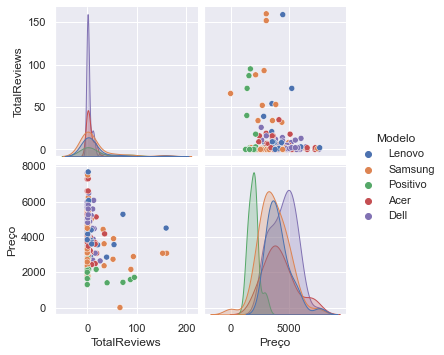

In [65]:
sns.pairplot(data=df_clean, hue="Modelo")


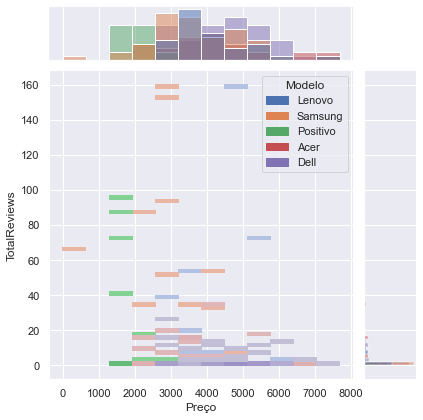

In [68]:
sns.jointplot(data=df_clean, x="Preço", y="TotalReviews", hue="Modelo", kind="hist")
